In [2]:
import numpy as np
from skimage import io, exposure, transform
from matplotlib import pyplot as plt
from IPython.display import Image
import os, sys

In [3]:
%matplotlib inline

In [4]:
def read_band(n):
    """
    Load Landsat 8 band
    Input:
    n - integer in the range 1-11
    Output:
    img - 2D array of uint16 type
    """
    if n in range(1, 12):
        tif_list = os.listdir()
        band_name = 'B' + str(n) + '.TIF'
        img_idx = [idx for idx, band_string in enumerate(tif_list) if band_name in band_string]
        img = io.imread(tif_list[img_idx[0]])
        return img
    else:
        print('Band number has to be in the range 1-11!')

In [5]:
cd \Dataaa\LC08_L1TP_116049_20140530_20170422_01_T1.tar\LC08_L1TP_116049_20140530_20170422_01_T1\

D:\Dataaa\LC08_L1TP_116049_20140530_20170422_01_T1.tar\LC08_L1TP_116049_20140530_20170422_01_T1


In [6]:
b2 = read_band(2)
b3 = read_band(3)
b4 = read_band(4)
b8 = read_band(8)

In [7]:
img432_roi = np.dstack((b4, b3, b2))[4400:5200, 3500:4100, :]

In [8]:
b4 = b4/b4.max()
b3 = b3/b3.max()
b2 = b2/b2.max()
b8 = b8/b8.max()

In [9]:
b4 = b4[4400:5200, 3500:4100]
b3 = b3[4400:5200, 3500:4100]
b2 = b2[4400:5200, 3500:4100]
b8 = b8[8800:10400, 7000:8200]

In [21]:
img432 = np.dstack((b4, b3, b2))
img432_2x = transform.rescale(img432, 2, multichannel=True)

In [22]:
m = np.sum(img432_2x, axis=2)
ps4 = b8*img432_2x[:, :, 0]/m
ps3 = b8*img432_2x[:, :, 1]/m
ps2 = b8*img432_2x[:, :, 2]/m
img432_ps = np.dstack((ps4, ps3, ps2))

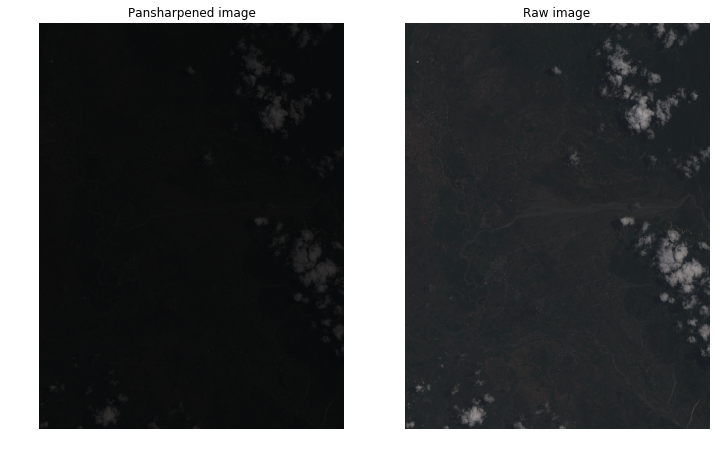

In [23]:
fig = plt.figure(figsize=(12, 9))
fig.set_facecolor('white')

ax1 = fig.add_subplot(121)
ax1.imshow(img432_ps)
plt.title('Pansharpened image')
plt.axis('off')

ax2 = fig.add_subplot(122)
ax2.imshow(img432_roi/65535)
plt.title('Raw image')
plt.axis('off')

plt.show()

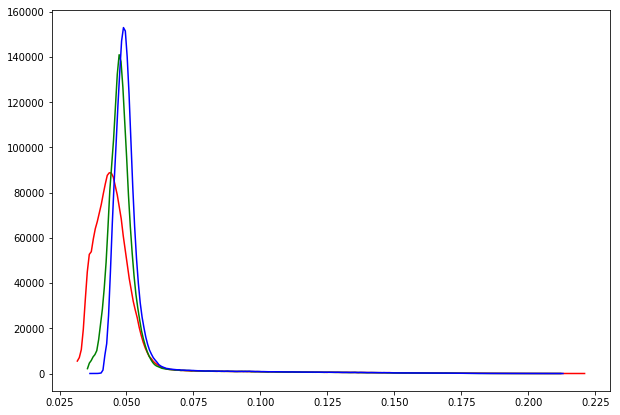

In [30]:
fig = plt.figure(figsize=(10, 7))
fig.set_facecolor('white')

for color, channel in zip('rgb', np.rollaxis(img432_ps, axis=-1)):
    counts, centers = exposure.histogram(channel)
    plt.plot(centers[1::], counts[1::], color=color)

plt.show()

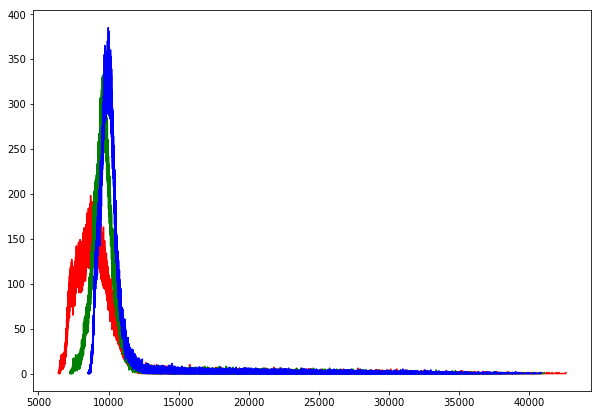

In [31]:
fig = plt.figure(figsize=(10, 7))
fig.set_facecolor('white')

for color, channel in zip('rgb', np.rollaxis(img432_roi, axis=-1)):
    counts, centers = exposure.histogram(channel)
    plt.plot(centers[1::], counts[1::], color=color)

plt.show()

In [36]:
img1 = np.empty(img432_ps.shape, dtype='float64')
lims = [(0.027,0.065), (0.03, 0.066), (0.031, 0.067)]
for lim, channel in zip(lims, range(3)):
    img1[:, :, channel] = exposure.rescale_intensity(img432_ps[:, :, channel], lim)

In [37]:
img2 = np.empty(img432_roi.shape, dtype='float64')
lims = [(7100,12500), (8200, 14000), (9200,17500)]
for lim, channel in zip(lims, range(3)):
    img2[:, :, channel] = exposure.rescale_intensity(img432_roi[:, :, channel], lim)


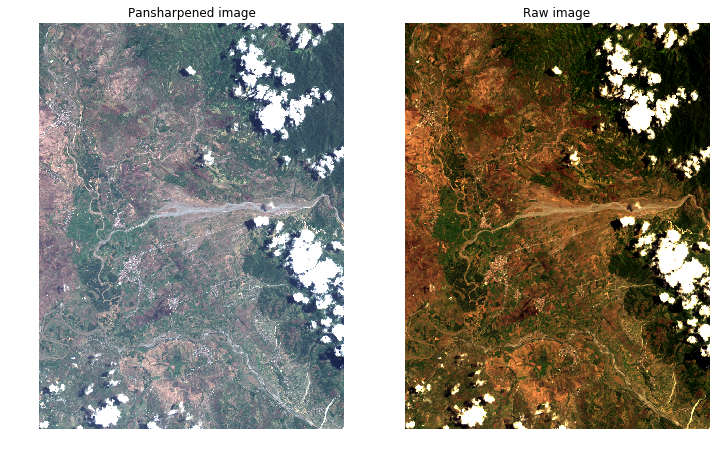

In [38]:
fig = plt.figure(figsize=(12, 9))
fig.set_facecolor('white')

ax1 = fig.add_subplot(121)
ax1.imshow(img1)
plt.title('Pansharpened image')
plt.axis('off')

ax2 = fig.add_subplot(122)
ax2.imshow(img2/65535)
plt.title('Raw image')
plt.axis('off')

plt.show()


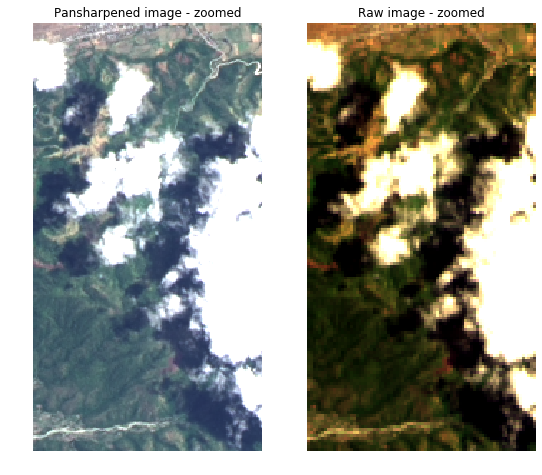

In [39]:
fig = plt.figure(figsize=(9, 12))
fig.set_facecolor('white')

ax1 = fig.add_subplot(121)
ax1.imshow(img1[750:1050, 880:1040, :])
plt.title('Pansharpened image - zoomed')
plt.axis('off')

ax2 = fig.add_subplot(122)
ax2.imshow(img2[375:525, 440:520, :]/65535)
plt.title('Raw image - zoomed')
plt.axis('off')

plt.show()